In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255 

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100

data_path = "../data/"

### |df|

p( without correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


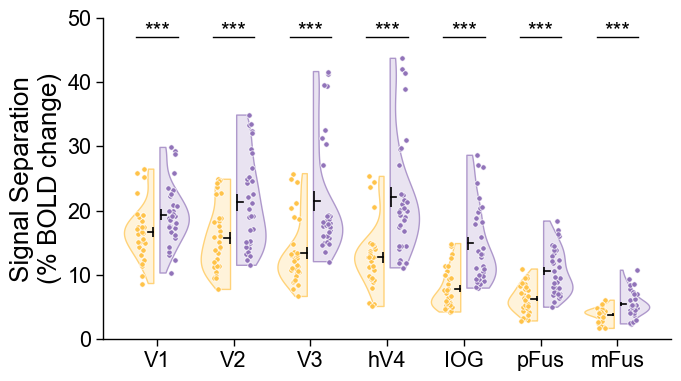

In [3]:
dfnorm_d_subj = np.load(data_path+'dfnorm.npz',allow_pickle=True)['dfnorm_d_subj'] # d x subj x roi x task

# average accuracy for near/far distance
dfnorm_nf_subj = np.zeros([4*nsubj,nroi,ntask,len(nf)])*np.nan # 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = dfnorm_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            dfnorm_nf_subj[:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
dfnorm_nf_subj[:,:,[0,1],:] = dfnorm_nf_subj[:,:,[1,0],:] # 4*8samples x roi x task x nf

# far distance condition
i = 1 # nf=1(far)

# test
ps0,sts = pair_test(dfnorm_nf_subj[:,:,:,i],method='wilcoxon',correction='none')
ps,sts = pair_test(dfnorm_nf_subj[:,:,:,i],method='wilcoxon',correction='bonferroni')
print('p( without correction):{}'.format([round(p,4) for p in ps0]))
print('p(correction):{}'.format([round(p,4) for p in ps]))    

# plot
ylims = [[0,50,10],[0,50,10]]
pys = [48,47]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(7,4))
set_ax(axes)
myviolinplot_pair(axes,dfnorm_nf_subj[:,:,:,i],'mean','sem',ps,pys)
axes.set_ylabel('Signal Separation\n(% BOLD change)')
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[i][0],ylims[i][1]*1.01,ylims[i][2]))
axes.set_xlim([0.3,7.7])
axes.set_ylim(ylims[i][:2])
fig.savefig('fig5-dfnorm.pdf', bbox_inches='tight')


### Variance


p( without correction):[0.0, 0.0006, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[0.0, 0.0039, 0.0, 0.0, 0.0, 0.0, 0.0]


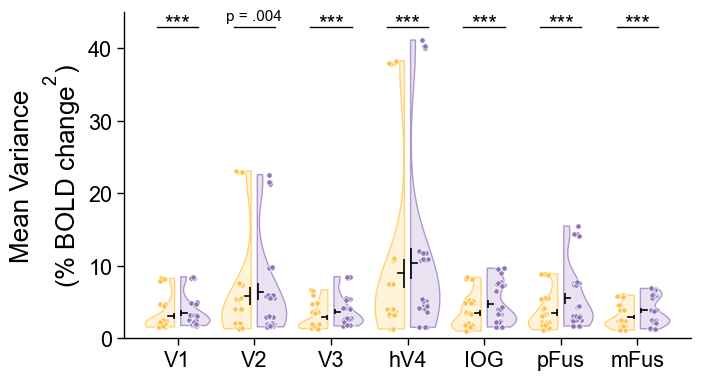

In [4]:
v_d_subj = np.load(data_path+'meanvariance.npz',allow_pickle=True)['v_d_subj'] # d x subj x roi x task

# average accuracy for near/far distance
v_nf_subj = np.zeros([4*nsubj,nroi,ntask,len(nf)])*np.nan # 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = v_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            v_nf_subj[:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
v_nf_subj[:,:,[0,1],:] = v_nf_subj[:,:,[1,0],:] # 4*8samples x roi x task x nf


# far distance condition
i = 1 # nf=1(far)

# test
ps0,sts = pair_test(v_nf_subj[:,:,:,i],method='wilcoxon',correction='none')
ps,sts = pair_test(v_nf_subj[:,:,:,i],method='wilcoxon',correction='bonferroni')
print('p( without correction):{}'.format([round(p,4) for p in ps0]))
print('p(correction):{}'.format([round(p,4) for p in ps]))    

# plot
ylims = [[0,45,10],[0,45,10]]
pys = [43.5,43]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(7.2,4))
set_ax(axes)
myviolinplot_pair(axes,v_nf_subj[:,:,:,i],'mean','sem',ps,pys)
axes.set_ylabel('Mean Variance'+'\n(% '+ 'BOLD change'+'$^2$'+')')
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[i][0],ylims[i][1]*1.01,ylims[i][2]))
axes.set_xlim([0.3,7.7])
axes.set_ylim(ylims[i][:2])
fig.savefig('fig5-meanvariance.pdf', bbox_inches='tight')


### Signal rotation

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33972\246526986.py:20: SyntaxWarning: invalid escape sequence '\d'
  axes.set_ylabel('Signal Rotation Angle ($\degree$)')


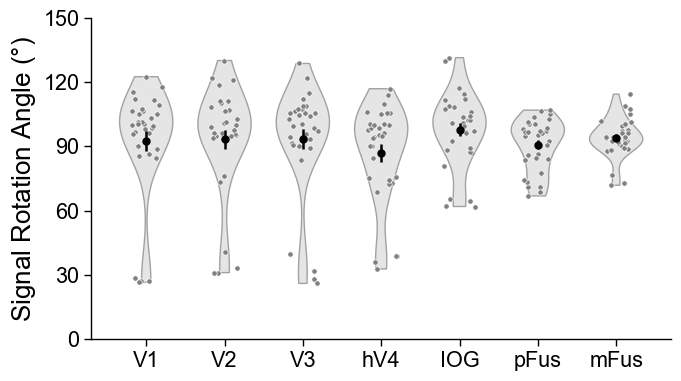

In [5]:
srangle_d_subj = np.load(data_path+'srangle.npz',allow_pickle=True)['srangle_d_subj'] # d x subj x roi

# average srangle for near/far distance
srangle_nf_subj = np.zeros([4*nsubj,nroi,len(nf)])*np.nan # 4*8samples x roi x nf
for roi_i in range(nroi):
    for i in range(len(num_nf)):
        data = srangle_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i]
        srangle_nf_subj[:,roi_i,i] = data.reshape([data.shape[0]*data.shape[1]])


# far distance condition
i = 1 # nf=1(far)

# plot
ylims = [[0,150,30],[0,150,30]]
set_figure()
fig,axes = plt.subplots(1,1,figsize=(7,4))
set_ax(axes)
myviolinplot_ind(axes,srangle_nf_subj[:,:,i],'mean','sem',[],[])
axes.set_ylabel('Signal Rotation Angle ($\degree$)')
axes.set_xticklabels(roi_labels)
axes.set_yticks(np.arange(ylims[i][0],ylims[i][1]*1.01,ylims[i][2]))
axes.set_xlim([0.3,7.7])
axes.set_ylim(ylims[i][:2])
fig.savefig('fig5-srangle.pdf', bbox_inches='tight')

### Covariance

***PC Rotation Angle***



***PC Variance***

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33972\3358109383.py:13: SyntaxWarning: invalid escape sequence '\d'
  ylbls = 'PC rotation Angle ($\degree$)'; xlbls = 'PC'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33972\3358109383.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig5-cwangle.pdf', bbox_inches='tight')
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


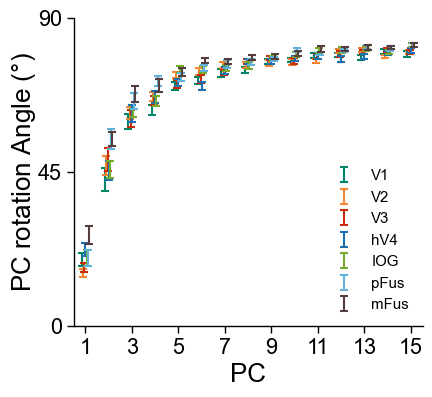

In [6]:
cwangle_d_subj = np.load(data_path+'cwangle.npz',allow_pickle=True)['cwangle_d_subj'] # nvertex x d x subj x roi

# average cwangle for near/far distance
cwangle_nf_subj = np.zeros([nvertex,4*nsubj,nroi,len(nf)])*np.nan # nvertex x 4*8samples x roi x nf
for roi_i in range(nroi):
    for i in range(len(num_nf)):
        data = cwangle_d_subj[:,num_nf[i][0]:num_nf[i][1],:,roi_i]
        cwangle_nf_subj[:,:,roi_i,i] = data.reshape([data.shape[0],data.shape[1]*data.shape[2]])
            
set_figure()
fig,axes = plt.subplots(1,1,figsize=(4.5,4),gridspec_kw={'wspace': 0.3})
set_ax(axes)
ylbls = 'PC rotation Angle ($\degree$)'; xlbls = 'PC'
pcmax = 15
ylims = [[0,90,45],[0,90,45]]
xlims = [[1,pcmax,2],[1,pcmax,2]]
data_m,data_e = np.zeros([nroi]),np.zeros([nroi])
alphas = np.logspace(np.log10(0.1),np.log10(1),nroi)
cms_roi = ['#76ce93','#186656','#4394a9','#075097','#e06c31','#9f77c7','#e395a4']
cms_roi = ['#00846a','#f18530','#c72c08','#1c70b2','#76ab2d','#5fb2d9','#553d3e']
for i in range(1,2): # nf=1(far)
    data = cwangle_nf_subj[:,:,:,i].transpose([1,0,2])
    [data_m,data_e,bsample] = stat_m_e(data,mtype='mean',etype='sem')
    for roi_i in range(nroi):
        axes.errorbar(np.arange(1,nvertex+1)+(roi_i-3)*0.05,data_m[:,roi_i],data_e[:,roi_i],label=roi_labels[roi_i],
                         marker='none',color=cms_roi[roi_i],linewidth=0,
                         ecolor=cms_roi[roi_i],elinewidth=1.5, capsize=3, capthick=1.5,
                         alpha=1)#alphas[roi_i]  'black'
    # 设置标题和标签
    axes.set_ylabel(ylbls, labelpad=0)
    axes.set_xlabel(xlbls)
    # 设置坐标轴刻度
    axes.set_xticks(np.arange(xlims[i][0],xlims[i][1]*1.01,xlims[i][2]))
    axes.set_yticks(np.arange(ylims[i][0],ylims[i][1]*1.01,ylims[i][2]))
    axes.set_xlim([xlims[i][0]-0.5,xlims[i][1]+0.5])
    axes.set_ylim(ylims[i][:2])
plt.legend(fontsize = 'small', framealpha=0)
fig.savefig('fig5-cwangle.pdf', bbox_inches='tight')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33972\4209727395.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig5-cwvariance.pdf', bbox_inches='tight')


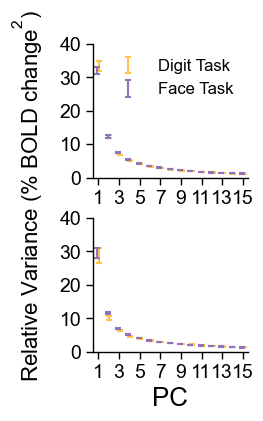

In [7]:
pcvi_d_subj = np.load(data_path+'cwangle.npz',allow_pickle=True)['pcvi_d_subj'] # nvertex x d x subj x roi x task

# average pc variance for near/far distance
pcvi_nf_subj = np.zeros([nvertex,4*nsubj,nroi,ntask, len(nf)])*np.nan # nvertex x 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = pcvi_d_subj[:,num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            pcvi_nf_subj[:,:,roi_i,task_i,i] = data.reshape([data.shape[0],data.shape[1]*data.shape[2]])
pcvi_nf_subj[:,:,:,[0,1],:] = pcvi_nf_subj[:,:,:,[1,0],:]

# plot
set_figure()
fig,axes = plt.subplots(2,1,figsize=(2,4),gridspec_kw={'wspace': 0.5,'hspace': 0.3},sharex='row', sharey='col')
ylbls = 'Relative Variance (% BOLD change$^2$)'; xlbls = 'PC'
pcmax = 15
ytks = [[0,40,10],[0,40,10]]
xtks = [[1,pcmax,2],[1,pcmax,2]]
data_m,data_e = np.zeros([nroi]),np.zeros([nroi])
roi_sel = [0,6]
for i in range(1,2): # nf=1(far)
    for j in range(2):
        set_ax(axes[j])
        for ng in range(ntask):
            roi_i = roi_sel[j]
            data = pcvi_nf_subj[:,:,roi_i,ng,i].transpose([1,0])
            [data_m,data_e,bsample] = stat_m_e(data,mtype='mean',etype='sem')
            axes[j].errorbar(np.arange(1,nvertex+1)+(1-2*ng)*0.07,data_m,data_e,label=roi_labels[roi_i],
                            marker='none',linewidth=0,color=cms[ng],
                            ecolor=cms[ng],elinewidth=1.5, capsize=2, capthick=1.5,
                            alpha=1)
            axes[1].set_xlabel(xlbls)
            axes[j].set_xticks(np.arange(xtks[j][0],xtks[j][1]*1.01,xtks[j][2]))
            axes[j].set_yticks(np.arange(ytks[j][0],ytks[j][1]*1.01,ytks[j][2]))
            axes[j].set_xlim([xtks[i][0]-0.5,xtks[i][1]+0.5])
            axes[j].set_ylim(ytks[i][:2])
            axes[j].tick_params(axis='both', width=1, direction='out',labelsize=14) # , bottom=False
            pos = axes[j].get_position()
            axes[j].set_position([pos.x0 + 0.15, pos.y0, pos.width, pos.height])
axes[0].legend(task,fontsize = 12, framealpha=0,loc='upper right')
fig.text(0.01, 0.5, ylbls, va='center', rotation='vertical',fontsize=16)
fig.savefig('fig5-cwvariance.pdf', bbox_inches='tight')
